#Data pre-processing



In [11]:
import pandas as pd
train=pd.read_csv("/kaggle/input/pes-ec-mi-competition-b/train.csv")
test=pd.read_csv("/kaggle/input/pes-ec-mi-competition-b/test.csv")

In [166]:
train.shape

(8991, 59)

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8991 entries, 0 to 8990

Data columns (total 59 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   length                   8991 non-null   int64  

 1   chroma_stft_mean         8991 non-null   float64

 2   chroma_stft_var          8991 non-null   float64

 3   rms_mean                 8991 non-null   float64

 4   rms_var                  8991 non-null   float64

 5   spectral_centroid_mean   8991 non-null   float64

 6   spectral_centroid_var    8991 non-null   float64

 7   spectral_bandwidth_mean  8991 non-null   float64

 8   spectral_bandwidth_var   8991 non-null   float64

 9   rolloff_mean             8991 non-null   float64

 10  rolloff_var              8991 non-null   float64

 11  zero_crossing_rate_mean  8991 non-null   float64

 12  zero_crossing_rate_var   8991 non-null   float64

 13  harmony_mean             8991 non-null   float64

 14  harmo

In [169]:
# missing values check
null_counts = train.isnull().sum()   #no null values

# Display columns with missing values and the count of missing values in each column
columns_with_missing_values = null_counts[null_counts > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


#Data visualisation

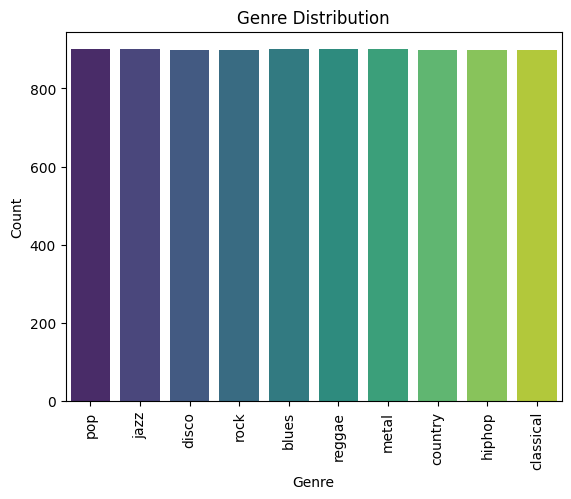

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar chart for 'label'
sns.countplot(data=train, x='label', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

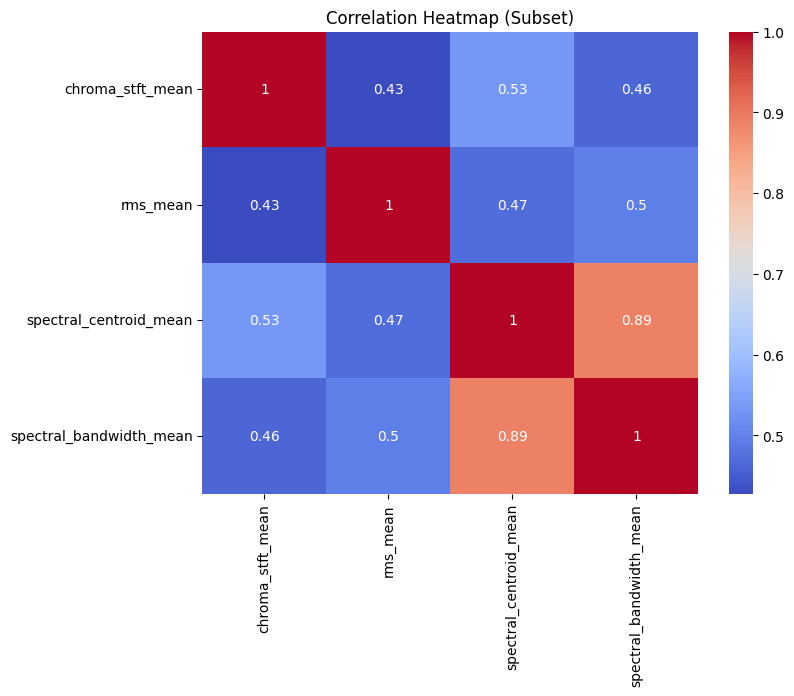

In [13]:
selected_columns = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'spectral_bandwidth_mean']

# Create a subset DataFrame with only the selected columns
subset_df = train[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap (Subset)')
plt.show()








#LIGHT GBM MODEL


In [74]:
import pandas as pd
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [75]:
train.shape

(8991, 60)

In [76]:
test.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34


In [77]:
train.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [78]:
train=train.drop('filename',axis=1)

In [79]:
train.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,4463.253268,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,2657.114446,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,4320.802847,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,4502.841233,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,4473.191669,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [80]:

unique_categories = sorted(train['label'].unique())


# Create a mapping of categories to numerical labels
label_mapping = {category: index for index, category in enumerate(unique_categories)}

# Create a new column 'label_encoded' with the mapped values
train['label'] = train['label'].map(label_mapping)

# Print the unique encoded labels in the new column
train['label']

0       7
1       5
2       3
3       9
4       5
       ..
8986    4
8987    1
8988    2
8989    0
8990    2
Name: label, Length: 8991, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

# Define features (X) and labels (y)
X = train.drop(columns=['label'])
y = train['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
#feature scaling
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

X_train_scaled

array([[ 0.        ,  0.53712961, -0.23538798, ...,  1.27925379,
         0.78505988, -0.20724734],
       [ 0.        ,  0.76962964, -0.0078856 , ...,  0.39742603,
        -0.21576892,  1.02351979],
       [ 0.        , -0.86708482, -0.07883292, ...,  0.11959224,
        -0.28432621, -0.40107706],
       ...,
       [ 0.        ,  0.30161432,  0.20665626, ..., -0.4473365 ,
        -0.19109106, -0.18597137],
       [ 0.        , -0.16849957,  0.44253116, ..., -0.56990021,
         2.07922778,  0.01794861],
       [ 0.        ,  0.97147046,  0.38844188, ...,  0.8842242 ,
        -0.06717637,  0.15316486]])

In [84]:
X_train_scaled

array([[ 0.        ,  0.53712961, -0.23538798, ...,  1.27925379,
         0.78505988, -0.20724734],
       [ 0.        ,  0.76962964, -0.0078856 , ...,  0.39742603,
        -0.21576892,  1.02351979],
       [ 0.        , -0.86708482, -0.07883292, ...,  0.11959224,
        -0.28432621, -0.40107706],
       ...,
       [ 0.        ,  0.30161432,  0.20665626, ..., -0.4473365 ,
        -0.19109106, -0.18597137],
       [ 0.        , -0.16849957,  0.44253116, ..., -0.56990021,
         2.07922778,  0.01794861],
       [ 0.        ,  0.97147046,  0.38844188, ...,  0.8842242 ,
        -0.06717637,  0.15316486]])

In [85]:
X_val_scaled

array([[ 0.        ,  0.15312343, -0.4230644 , ..., -0.76114728,
        -1.27696104, -0.4511593 ],
       [ 0.        , -1.78033788,  0.65721699, ...,  2.23712189,
         0.78555603,  0.52127011],
       [ 0.        , -1.32113272, -0.17012942, ..., -0.51577334,
        -0.64372345,  0.09855218],
       ...,
       [ 0.        , -2.04034615, -0.1879752 , ...,  2.99497157,
         3.05254219,  3.62701822],
       [ 0.        ,  0.15625351,  0.16637823, ..., -0.72285609,
         0.07552379, -0.90508292],
       [ 0.        , -0.72848036,  0.33256215, ..., -0.76199135,
        -0.04255873, -0.90160369]])

In [140]:
!pip install lightgbm


In [141]:
import lightgbm as lgb


In [143]:
params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),  # Number of unique classes
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

num_round = 200  # Number of boosting rounds


In [144]:
train_data = lgb.Dataset(X_train_scaled, label=y_train)
valid_data = lgb.Dataset(X_val_scaled, label=y_test, reference=train_data)


In [145]:
model = lgb.train(
    params,
    train_data,
    num_round,

)

In [152]:
y_pred_val = model.predict(X_test_scaled, num_iteration=model.best_iteration)
y_pred_val
y_pred_class_val= y_pred_val.argmax(axis = 1)
y_pred_class_val

array([2, 5, 1, ..., 1, 9, 5])

In [157]:
y_pred_final = model.predict(test_scaled, num_iteration=model.best_iteration)
y_pred_final

array([[2.33741526e-05, 1.24936173e-04, 5.55540044e-04, ...,
        7.60581973e-04, 6.08349952e-04, 9.94156525e-01],
       [6.36610177e-03, 6.55838778e-05, 5.14208436e-04, ...,
        2.10991608e-04, 1.34632000e-02, 2.70361695e-03],
       [9.09374188e-05, 1.38158131e-05, 4.89127121e-02, ...,
        8.88194911e-01, 4.74017684e-05, 5.13408752e-02],
       ...,
       [1.97923381e-06, 9.99914999e-01, 4.99974744e-07, ...,
        1.21282496e-05, 1.96494741e-06, 1.56595394e-05],
       [3.86059287e-04, 1.33595957e-04, 1.36010188e-04, ...,
        3.85136127e-05, 8.82638632e-05, 8.76867110e-02],
       [8.58188302e-04, 5.85507422e-04, 1.41989776e-01, ...,
        1.54109637e-01, 2.33741197e-02, 8.67917040e-03]])

#Predicted values


In [158]:

y_pred_final_class= y_pred_final.argmax(axis = 1)
y_pred_final_class


array([9, 6, 7, 2, 0, 2, 6, 4, 3, 0, 3, 7, 6, 9, 9, 6, 7, 9, 5, 7, 3, 1,
       3, 2, 4, 6, 4, 8, 8, 8, 1, 8, 5, 1, 3, 5, 3, 1, 0, 2, 7, 4, 5, 9,
       7, 5, 3, 1, 0, 2, 8, 8, 0, 8, 1, 2, 1, 0, 1, 4, 6, 2, 0, 1, 2, 5,
       8, 9, 4, 5, 2, 8, 4, 8, 0, 0, 3, 7, 1, 3, 0, 7, 7, 0, 3, 8, 4, 4,
       2, 8, 2, 2, 9, 9, 4, 3, 3, 0, 0, 4, 5, 8, 3, 6, 1, 9, 9, 6, 6, 5,
       3, 7, 1, 6, 0, 5, 2, 1, 6, 6, 8, 4, 5, 0, 0, 9, 6, 6, 3, 9, 7, 9,
       2, 9, 6, 0, 3, 5, 6, 1, 4, 9, 1, 4, 3, 3, 5, 1, 8, 3, 9, 9, 2, 3,
       9, 2, 5, 7, 5, 6, 9, 9, 3, 7, 3, 2, 1, 9, 1, 2, 8, 2, 3, 2, 5, 3,
       0, 2, 1, 1, 5, 3, 6, 2, 1, 7, 5, 9, 8, 1, 1, 3, 6, 6, 7, 3, 8, 5,
       8, 5, 2, 3, 7, 8, 5, 6, 9, 4, 5, 9, 5, 4, 5, 8, 3, 3, 2, 9, 4, 3,
       9, 4, 5, 9, 7, 3, 2, 6, 8, 2, 7, 0, 0, 0, 4, 4, 5, 8, 1, 2, 4, 9,
       5, 0, 8, 8, 7, 4, 4, 0, 2, 8, 9, 7, 5, 1, 0, 2, 1, 4, 0, 9, 0, 4,
       8, 7, 9, 1, 5, 9, 9, 3, 7, 2, 9, 8, 3, 9, 9, 6, 0, 6, 8, 2, 2, 7,
       4, 7, 2, 6, 6, 7, 6, 2, 4, 9, 8, 1, 5, 4, 3,

#Accuracy


In [153]:
accuracy = accuracy_score(y_test, y_pred_class_val)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9160644802668149


In [133]:
import numpy as np
y_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([2, 5, 1, ..., 1, 9, 5])

In [125]:
y_pred_class

array([2, 5, 1, ..., 1, 9, 5])

In [156]:
array_shape = y_pred_class.shape

# Print the shape
print(array_shape)

(1799,)


In [127]:
test.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,-0.707255,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,3.982878,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,-3.404634,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,0.601912,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,0.695706,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306


In [154]:
id

0      9586
1      6984
2      7047
3      2510
4        34
       ... 
994    4583
995    6045
996    1897
997    3565
998    5685
Name: id, Length: 999, dtype: int64

In [130]:
y_pred_class


array([2, 5, 1, ..., 1, 9, 5])

#Submission


In [160]:
submission_df = pd.DataFrame({'id': id,  'label': y_pred_final_class})

In [165]:
submission_df.to_csv('music_genre_predictions.csv', index=False)